In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/USA_cars_datasets.csv')
df

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


Находим количество пустых значений

In [ ]:
df.isna().sum()

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

Удаляем ненужный столбец

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [ ]:
df.min()

price                             0
brand                         acura
model                          1500
year                           1973
title_status          clean vehicle
mileage                         0.0
color                         beige
vin               19uua96529a004646
lot                       159348797
state                       alabama
country                      canada
condition               1 days left
dtype: object

Видно, что минимальная цена равна 0, и нужно найти строки

In [ ]:
df.loc[df['price'] < 500].head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
141,0,dodge,van,2008,salvage insurance,177948.0,orange,2d8hn44h88r669549,167756157,utah,usa,2 days left
144,0,dodge,door,2014,salvage insurance,123660.0,silver,1c3cdzab0en111068,167756167,utah,usa,2 days left
188,175,chrysler,door,2000,salvage insurance,231240.0,red,2c3hd46r3yh208325,167756464,north carolina,usa,3 days left
196,0,ford,mpv,2017,clean vehicle,76858.0,white,1fbax2cv0hkb32599,167656523,texas,usa,2 days left
206,25,chevrolet,vehicl,2020,salvage insurance,7232.0,black,2gnaxkev6l6128374,167756877,kentucky,usa,3 days left


Удалим эти строки

In [ ]:
df = df.drop(df.loc[df['price'] == 0].index)

In [ ]:
df.loc[df['price'] < 26].head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
206,25,chevrolet,vehicl,2020,salvage insurance,7232.0,black,2gnaxkev6l6128374,167756877,kentucky,usa,3 days left
209,25,chrysler,door,2005,salvage insurance,151815.0,silver,2c3ja43r35h179032,167757193,massachusetts,usa,3 days left
284,25,dodge,door,2007,salvage insurance,160528.0,dark blue,2b3ka43g87h836300,167416803,minnesota,usa,17 hours left
319,25,chevrolet,pickup,2010,salvage insurance,149189.0,white,3gcrkse37ag234620,167650663,colorado,usa,18 hours left
327,25,chevrolet,door,2011,salvage insurance,105244.0,white,1gccsbf97b8118236,167650664,colorado,usa,18 hours left


In [ ]:
df.min()

price                            25
brand                         acura
model                          1500
year                           1973
title_status          clean vehicle
mileage                         0.0
color                         beige
vin               19uua96529a004646
lot                       159348797
state                       alabama
country                      canada
condition               1 days left
dtype: object

In [ ]:
df.nunique()

price            789
brand             28
model            126
year              26
title_status       2
mileage         2401
color             47
vin             2453
lot             2453
state             43
country            2
condition         47
dtype: int64

In [ ]:
df.country.unique()

array([' usa', ' canada'], dtype=object)

Видно, что столбец country содержит ненужный символ пробела

In [ ]:
df['country'] = df['country'].apply(lambda x:x.replace(" ", ""))
ascii(df['country'][1])

"'usa'"

Находим автомобили из Канады

In [ ]:
df.query("country == 'canada'")

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
261,33000,chevrolet,1500,2018,clean vehicle,52521.0,white,3gcukreh0jg303596,167766786,ontario,canada,10 days left
813,30000,dodge,charger,2019,clean vehicle,43294.0,white,2c3cdxjg2kh630921,167766742,ontario,canada,10 days left
814,30000,dodge,charger,2019,clean vehicle,54309.0,orange,2c3cdxjg0kh682158,167766743,ontario,canada,10 days left
815,30000,dodge,charger,2019,clean vehicle,52822.0,white,2c3cdxjg2kh658962,167766751,ontario,canada,10 days left
816,30000,dodge,charger,2019,clean vehicle,45554.0,white,2c3cdxjg1kh630912,167766757,ontario,canada,10 days left
817,30000,dodge,charger,2019,clean vehicle,37538.0,white,2c3cdxjg1kh658953,167766758,ontario,canada,10 days left
818,29500,dodge,charger,2019,clean vehicle,35153.0,red,2c3cdxjg6kh630954,167766763,ontario,canada,10 days left


Строим график расперделения автомобилей по бренду

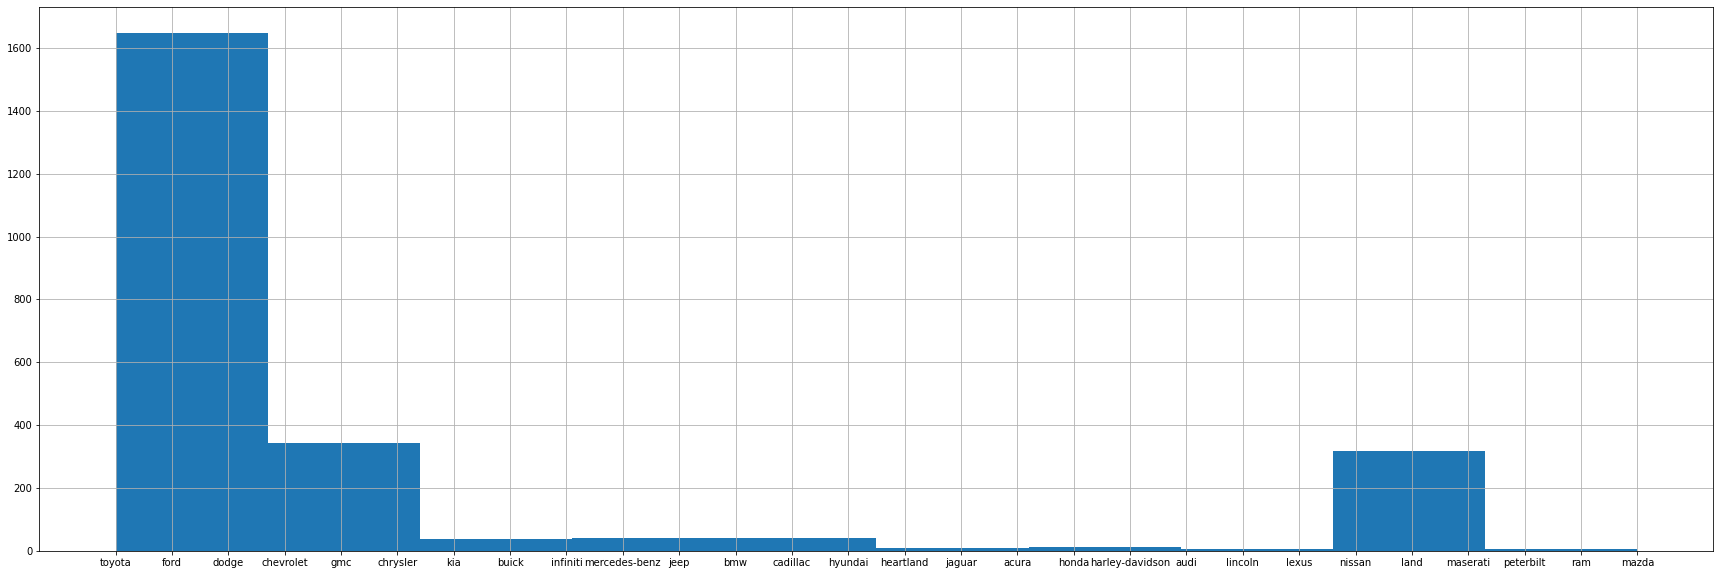

In [ ]:
h = df['brand'].hist(figsize=[30, 10])
fig = h.get_figure()







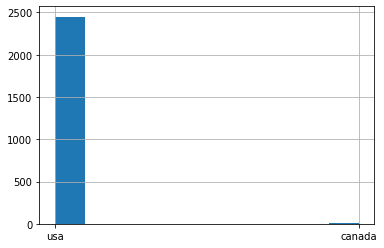

In [ ]:
h = df['country'].hist()
fig = h.get_figure()

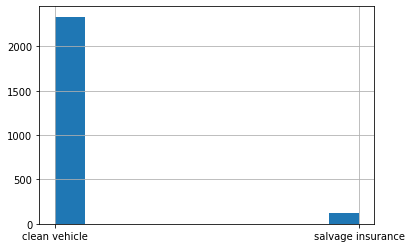

In [ ]:
h = df['title_status'].hist()
fig = h.get_figure()


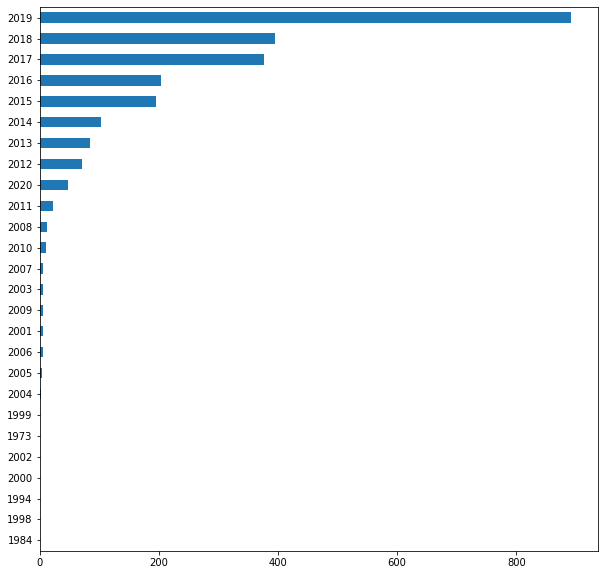

In [ ]:
df['year'].value_counts().sort_values().plot(kind = 'barh',figsize=[10, 10]);

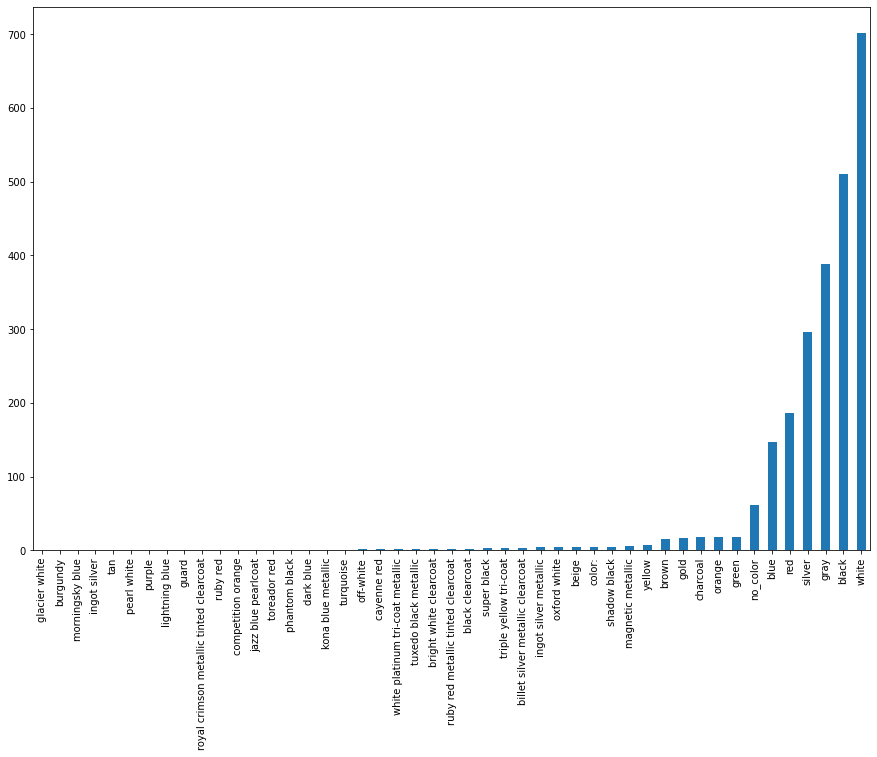

In [ ]:
df['color'].value_counts().sort_values().plot(kind = 'bar', figsize=[15, 10]);

Какая модель имеет самый низкий пробег?

In [ ]:
df[df['mileage'] == df['mileage'].min()]['model']

504     truck
1236     door
1619     door
Name: model, dtype: object

В каком штате наибольшее количество автомобилей dodge?

In [ ]:
df[df['brand'] == 'dodge'].value_counts('state').idxmax()

'pennsylvania'

Какой самый популярный цвет в самых дешевых автомобилях?

In [ ]:
df[df['price'] == df['price'].min()]['color'].value_counts()#.idxmax()

white        8
black        4
gray         3
silver       1
dark blue    1
brown        1
Name: color, dtype: int64

Какой бренд является самым продаваемым в Вирджинии?

In [ ]:
df[df['state'] == 'virginia'].value_counts('brand')#.idxmax()

brand
ford               52
gmc                10
dodge               9
nissan              8
honda               7
chevrolet           1
harley-davidson     1
dtype: int64

Когда Ford был самым продаваемым автомобилем?

In [ ]:
for year in df['year'].unique(): 
  if df[df['year'] == year].value_counts('brand').idxmax() == 'chevrolet':
    print (year)

2008
2011
2010
1973
2005
2006
2007
2004


Автомобилей какой марки болше всего?

In [ ]:
df.brand.value_counts()

ford               1217
dodge               430
nissan              312
chevrolet           286
gmc                  40
jeep                 30
chrysler             18
bmw                  16
hyundai              15
infiniti             12
buick                12
kia                  12
honda                11
mercedes-benz        10
cadillac              9
land                  4
heartland             4
acura                 3
peterbilt             3
audi                  3
lexus                 2
ram                   1
maserati              1
toyota                1
lincoln               1
harley-davidson       1
jaguar                1
mazda                 1
Name: brand, dtype: int64

Какая модель самая дорогая?

In [ ]:
df[df['price'] == df['price'].max()]['model']

502    sl-class
Name: model, dtype: object

In [ ]:
df.head(2)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left


Какой минимальный пробег в каждом штате?

In [ ]:
df1 = df.groupby('state').mileage.min()
df1

state
alabama            12129.0
arizona                1.0
arkansas           27442.0
california             0.0
colorado            9467.0
connecticut         6249.0
florida                0.0
georgia             9278.0
idaho             100947.0
illinois               1.0
indiana              401.0
kansas             11150.0
kentucky            7232.0
louisiana          47866.0
maryland           98384.0
massachusetts       4018.0
michigan            2452.0
minnesota           8404.0
mississippi        10099.0
missouri            5920.0
montana           363810.0
nebraska           27327.0
nevada               363.0
new hampshire      39509.0
new jersey          2807.0
new mexico         13558.0
new york            3915.0
north carolina         1.0
ohio                 671.0
oklahoma            6140.0
ontario            35153.0
oregon             24480.0
pennsylvania           0.0
rhode island       12840.0
south carolina      2089.0
tennessee           2430.0
texas               49

Какая средняя цена автомобиля каждой марки?

In [ ]:
df2 = df.groupby('brand').price.mean().round(2)
df2

brand
acura               7266.67
audi               18641.67
bmw                28046.88
buick              21358.75
cadillac           27712.22
chevrolet          19388.03
chrysler           13686.11
dodge              17864.70
ford               21987.35
gmc                11190.25
harley-davidson    54680.00
heartland           3707.50
honda               6684.55
hyundai             5203.20
infiniti           13098.33
jaguar              2800.00
jeep               10933.83
kia                12050.83
land               28900.00
lexus              33220.00
lincoln            36300.00
maserati           30300.00
mazda              16000.00
mercedes-benz      28704.00
nissan             12065.82
peterbilt            533.33
ram                11050.00
toyota              6300.00
Name: price, dtype: float64